# YouTube Data API v3

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

import collections

### Imported Scripts

In [ ]:
    # api_key is stored in config.py
import config

    # Functions for making youtube_requests
import youtube_requests

    # Functions for data processing
import data_processing

    # Functions for creating a network graph    
import network_graphs

import importlib
#importlib.reload(network_graphs)

In [3]:
%load_ext autoreload

In [4]:
%autoreload 1

In [5]:
%aimport network_graphs
%aimport youtube_requests

# YouTube Channel Details by Search

Returns a details list of channels for a specific search query and number of requested results.

Lets search the top 10 results for Corridor Crew. They are a YouTube channel that is part of a known community.

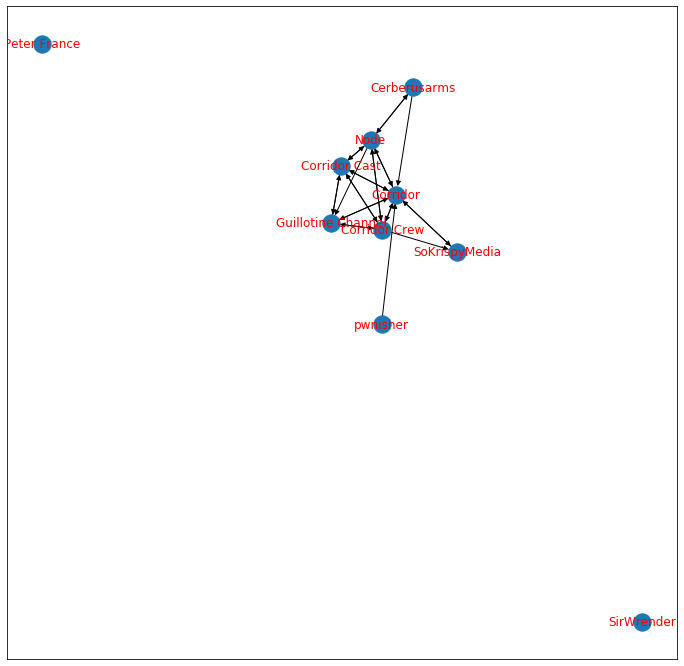

In [25]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_search('corridor crew',10)

# Graph the network of channels
G= network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, directed=True)

# Extract a columnar list of channel details
#CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
#DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
network_graphs.graph_nx_graph(G)

# Youtube Channel Details by Network

In [26]:
[channel['snippet']['title'] for channel in CHANNELS_DETAILS_ITEMS_LIST]

['Corridor Cast',
 'pwnisher',
 'Cerberusarms',
 'Corridor',
 'Corridor Crew',
 'SoKrispyMedia',
 'Peter France',
 'SirWrender',
 'Node',
 'Guillotine Channel']

In [27]:
indices = [0,3,4,8,9]
[channel['snippet']['title'] for channel in CHANNELS_DETAILS_ITEMS_LIST]
CORRIDOR_FULL = [CHANNELS_DETAILS_ITEMS_LIST[i] for i in indices]


-------

25 total neighbors; 0 out of 5 channels do not feature channels
97 total neighbors; 2 out of 20 channels do not feature channels


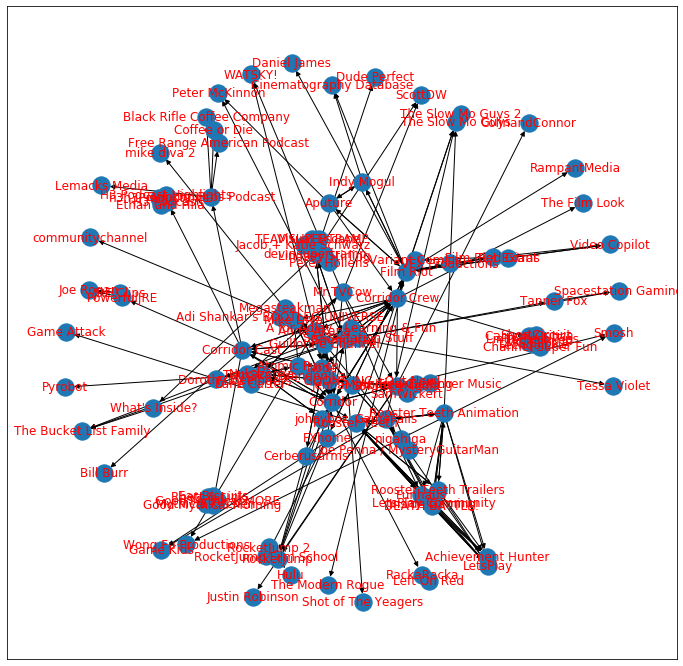

In [28]:
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(CORRIDOR_FULL, 2)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G
network_graphs.graph_nx_graph(G)

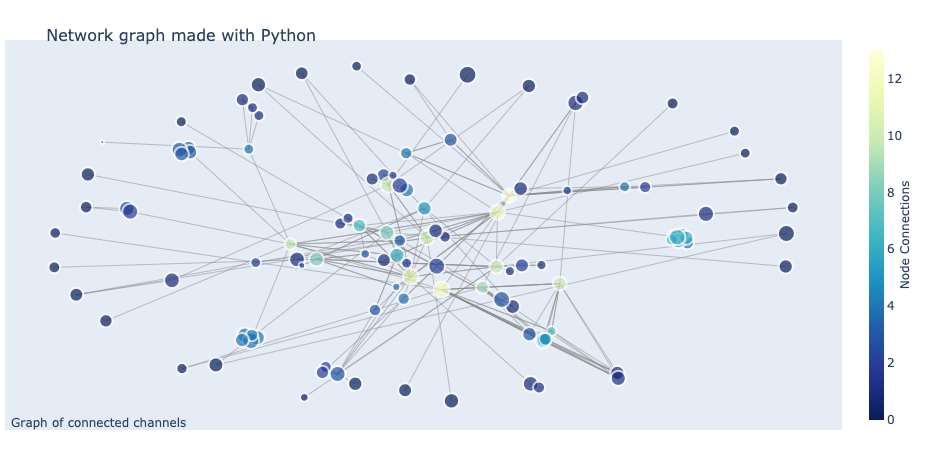

In [29]:
network_graphs.plotly_network_graph(G)

## Page Rank, In-Degree centrality, betweeness centrality, and indegree value

In [30]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

Sort channels by page rank

In [41]:
DF[['title','subscriberCount','viewCount','page_rank','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality']].sort_values(
    'page_rank', ascending=False).head(8)

title  subscriberCount   viewCount  page_rank  \
32    Carpool Critics            41200      400367   0.091585   
17    Linus Tech Tips         11500000  3899734482   0.091585   
29       ShortCircuit           936000    54203278   0.091585   
36         TechLinked          1250000   181059678   0.091585   
43        Techquickie          3520000   524324015   0.091585   
54          LMG Clips           176000    19612357   0.091585   
71  Channel Super Fun           739000    97590782   0.064253   
2       Corridor Crew          4090000   706493568   0.047295   

    featuredChannelsCount  degree  in_degree  betweenness_centrality  \
32                      6      11          5                0.000000   
17                      6      13          7                0.020559   
29                      6      11          5                0.000000   
36                      6      12          6                0.000042   
43                      6      12          6                0.000042   
54                      6      12          6                0.000042   
71                      4      10          6                0.000000   
2                      12      20          8                0.146542   

    in_degree_centrality  
32              0.045455  
17              0.063636  
29              0.045455  
36              0.054545  
43              0.054545  
54              0.054545  
71              0.054545  
2               0.072727

In [32]:
betweenness_dict = nx.betweenness_centrality(G)
in_degree_dict = nx.in_degree_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_dict[x])

Sort channels by betweenness centrality.

In [33]:
DF[['title','id','subscriberCount','viewCount','featuredChannelsCount', 'page_rank','betweenness_centrality','in_degree_centrality']].sort_values('betweenness_centrality', ascending=False).head(8)

title                        id  subscriberCount   viewCount  \
1          Corridor  UCsn6cjffsvyOZCZxvGoJxGg          8060000  1463250152   
2     Corridor Crew  UCSpFnDQr88xCZ80N-X7t0nQ          4090000   706493568   
0     Corridor Cast  UCNSeDrWRGxx5p2l3tj7RWQw           110000     4990381   
10        Film Riot  UC6P24bhhCmMPOcujA9PKPTA          1670000   191532908   
11  devinsupertramp  UCwgURKfUA7e0Z7_qE3TvBFQ          5920000  1436117980   
19        Shonduras  UCoK5NOxkZBLfI_5eqf8Es4Q          2440000  1628005096   
22    SoKrispyMedia  UCKo61AAaRD00ibCWJZ321MQ          1130000   315561825   
23        Mike Diva  UC6Je0KLSDuKLfKs1lEBzKrQ           650000   142737115   

    featuredChannelsCount  page_rank  betweenness_centrality  \
1                      11   0.033504                0.183506   
2                      12   0.047295                0.146542   
0                      10   0.023768                0.100167   
10                     13   0.016631                0.076642   
11                     10   0.010800                0.069323   
19                     10   0.011660                0.059808   
22                     10   0.011749                0.055512   
23                      7   0.009866                0.045655   

    in_degree_centrality  
1               0.127273  
2               0.072727  
0               0.036364  
10              0.072727  
11              0.063636  
19              0.045455  
22              0.063636  
23              0.063636

Sort channels by in_degree centrality.

In [34]:
DF[['title','id','subscriberCount','viewCount','featuredChannelsCount', 'page_rank','betweenness_centrality','in_degree_centrality']].sort_values('in_degree_centrality', ascending=False).head(8)

title                        id  subscriberCount   viewCount  \
1             Corridor  UCsn6cjffsvyOZCZxvGoJxGg          8060000  1463250152   
90            LetsPlay  UCkxctb0jr8vwa4Do6c6su0Q          3850000  2431520849   
2        Corridor Crew  UCSpFnDQr88xCZ80N-X7t0nQ          4090000   706493568   
16           Nukazooka  UCQqi--mpTFtGNim0WCtPH-A          2250000   669129570   
15       Rooster Teeth  UCzH3iADRIq1IJlIXjfNgTpA          9470000  6077158993   
10           Film Riot  UC6P24bhhCmMPOcujA9PKPTA          1670000   191532908   
11     devinsupertramp  UCwgURKfUA7e0Z7_qE3TvBFQ          5920000  1436117980   
28  Achievement Hunter  UCsB0LwkHPWyjfZ-JwvtwEXw          1640000   900009979   

    featuredChannelsCount     page_rank  betweenness_centrality  \
1                      11  3.350372e-02                0.183506   
90                      1  6.639924e-17                0.000042   
2                      12  4.729505e-02                0.146542   
16                      8  1.790866e-02                0.042045   
15                     12  5.619542e-04                0.040979   
10                     13  1.663137e-02                0.076642   
11                     10  1.079989e-02                0.069323   
28                      1  6.639924e-17                0.000000   

    in_degree_centrality  
1               0.127273  
90              0.081818  
2               0.072727  
16              0.072727  
15              0.072727  
10              0.072727  
11              0.063636  
28              0.063636

## Strongly Connected Components

In [35]:
scc_list = [scc for scc in nx.strongly_connected_components(G)]

In [ ]:
scc_list[42]

In [37]:
H = G.subgraph(list(scc_list[42]))

Plot of our subgraph of strongly connected components

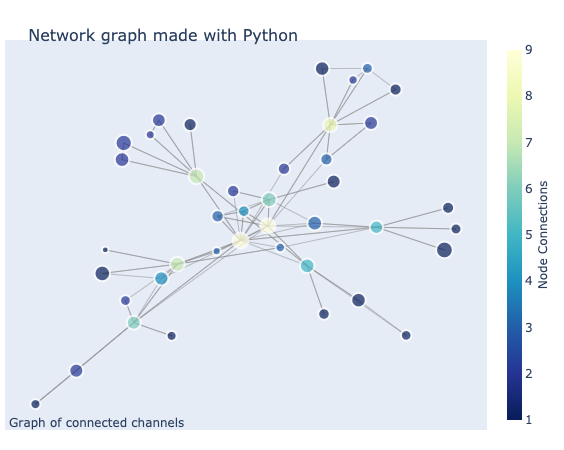

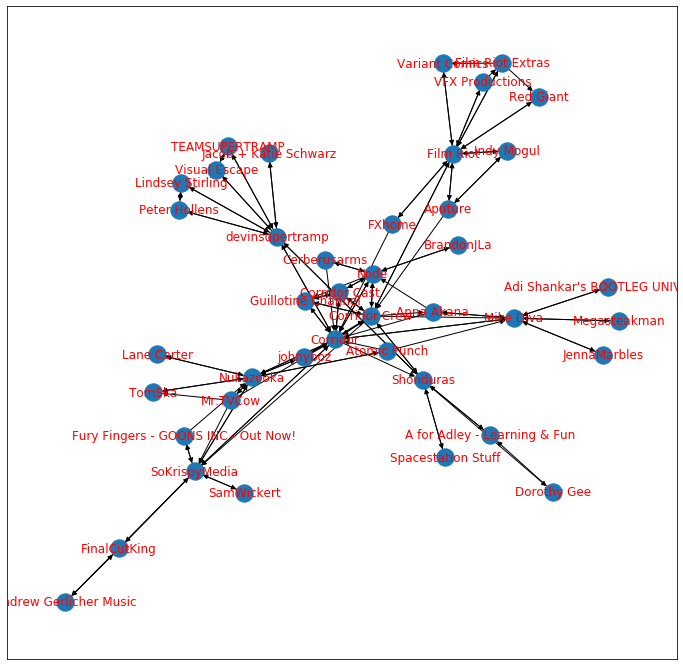

In [40]:
network_graphs.graph_nx_graph(H)
network_graphs.plotly_network_graph(H)